In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [3]:
# Load datasets
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")

In [4]:
# Add country labels
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierra["Country"] = "Sierra Leone"

In [5]:
# Combine datasets
df_all = pd.concat([benin, togo, sierra], ignore_index=True)

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_60663/3972746656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


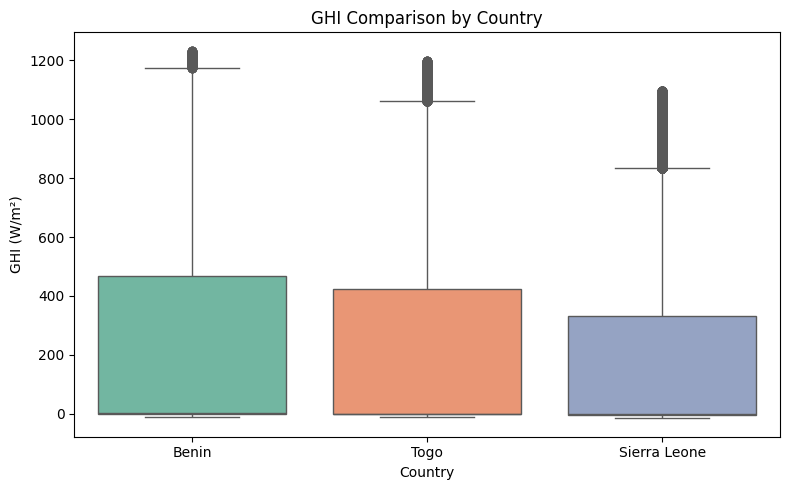

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_60663/3972746656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


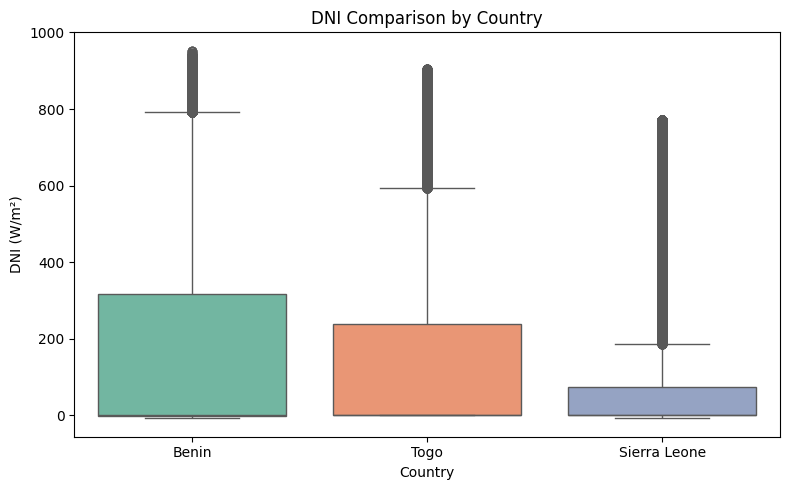

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_60663/3972746656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


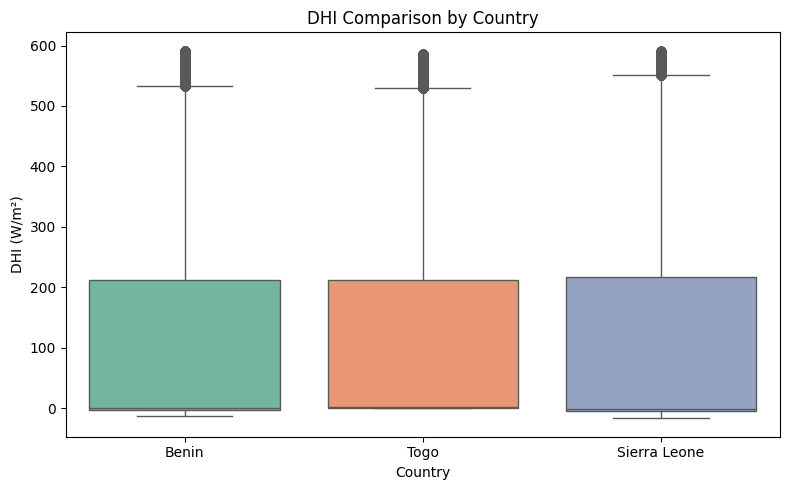

In [6]:
# Boxplots for GHI, DNI, DHI
metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")
    plt.title(f"{metric} Comparison by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.tight_layout()
    plt.savefig(f"../figures/compare_{metric.lower()}_boxplot.png")
    plt.show()

In [7]:
# Summary statistics
summary_table = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg([
    "mean", "median", "std"])
summary_table.columns = ['_'.join(col) for col in summary_table.columns]
summary_table.reset_index(inplace=True)
summary_table

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,236.234508,0.7,328.288787,166.896673,-0.1,262.081997,111.656477,0.5,153.099749
1,Sierra Leone,185.000024,-0.4,279.019460,104.128943,-0.1,200.954182,108.104278,-0.6,153.691835
2,Togo,223.859675,0.5,317.306277,147.975931,0.0,247.683690,112.781249,1.5,151.571744


/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_60663/2490251016.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_all, x="Country", y="GHI",
/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_60663/2490251016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_all, x="Country", y="GHI",


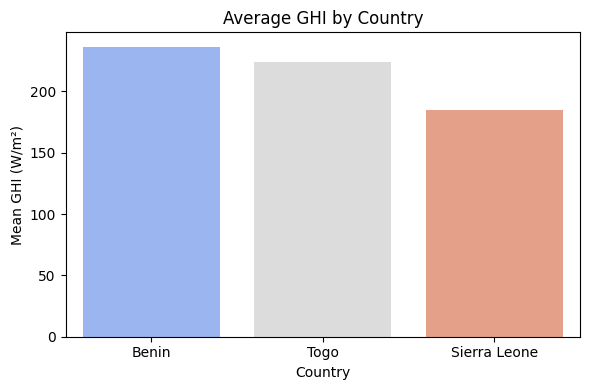

In [8]:
# Average GHI bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=df_all, x="Country", y="GHI",
            estimator="mean", palette="coolwarm", ci=None)
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI (W/m²)")
plt.tight_layout()
plt.savefig("../figures/average_ghi_by_country.png")
plt.show()

In [9]:
# ANOVA and Kruskal-Wallis testing
# Extract GHI per group
ghi_benin = benin["GHI"]
ghi_togo = togo["GHI"]
ghi_sierra = sierra["GHI"]

# One-Way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

# Kruskal–Wallis Test
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_togo, ghi_sierra)

print(f"ANOVA p-value: {anova_p:.4f}")
print(f"Kruskal–Wallis p-value: {kruskal_p:.4f}")

ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000
